<a href="https://colab.research.google.com/github/Diwakar-Gupta/DataScience/blob/main/22-02-16-Hierarchical/Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv')
df.sample(7)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
127,128,Male,40,71,95
194,195,Female,47,120,16
182,183,Male,46,98,15
49,50,Female,31,40,42
170,171,Male,40,87,13
48,49,Female,29,40,42
75,76,Male,26,54,54


In [4]:
df.rename(columns = {
    'Annual Income (k$)': 'AnnualIncome',
    'Spending Score (1-100)': 'SpendingScore'
}, inplace = True)
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.drop('CustomerID', axis = 1, inplace = True)

In [6]:
df.isna().sum()

Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

In [8]:
df['Gender'].replace({
    'Male':1,
    'Female':0
}, inplace = True)

In [21]:
df.sample(7)

,Gender,Age,AnnualIncome,SpendingScore
54,0,50,43,45
163,0,31,81,93
175,0,30,88,86
169,1,32,87,63
44,0,49,39,28
141,1,32,75,93
49,0,31,40,42


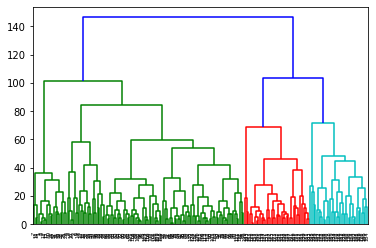

In [12]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

merge = linkage(df, method='complete', metric='euclidean')
dendrogram(merge)
plt.show()

In [20]:
from scipy.cluster.hierarchy import cut_tree

y_pred = cut_tree(merge, n_clusters=3)
y_pred = y_pred.reshape(-1)

In [32]:
import plotly.express as px

px.scatter_3d(df, x = 'AnnualIncome', y='SpendingScore', z = 'Age', color = y_pred)

In [33]:
import plotly.express as px

px.scatter_3d(df, x = 'AnnualIncome', y='SpendingScore', z = 'Gender', color = y_pred)

In [34]:
import plotly.express as px

px.scatter(df, x = 'AnnualIncome', y='SpendingScore', color = y_pred)

In [35]:
from scipy.cluster.hierarchy import cut_tree

y_pred = cut_tree(merge, n_clusters=5)
y_pred = y_pred.reshape(-1)

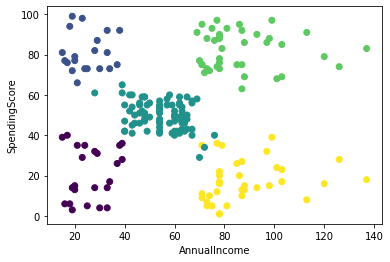

In [38]:
plt.scatter(df['AnnualIncome'], y=df['SpendingScore'], c = y_pred)
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.show()

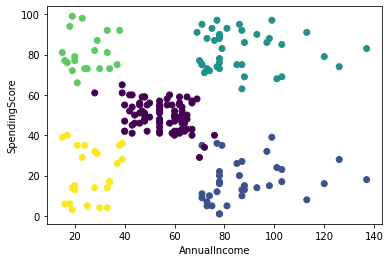

In [45]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters = 5)
y_pred = agg.fit_predict(df)

plt.scatter(df['AnnualIncome'], y=df['SpendingScore'], c = y_pred)
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.show()

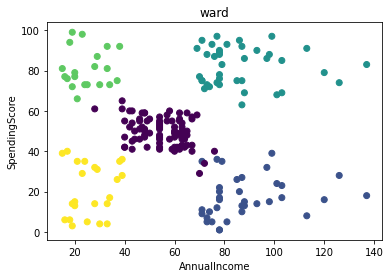

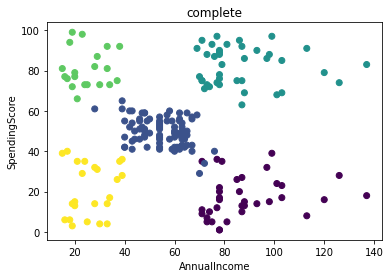

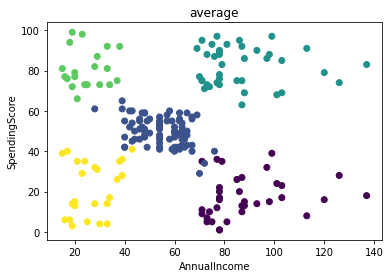

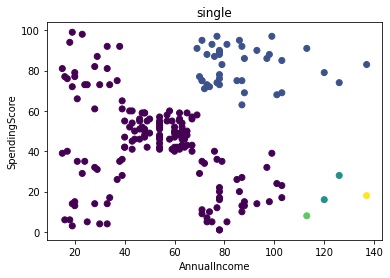

In [47]:
links = ['ward', 'complete', 'average', 'single']

for link in links:
    agg = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage=link)
    y_pred = agg.fit_predict(df)

    plt.title(link)
    plt.scatter(df['AnnualIncome'], y=df['SpendingScore'], c = y_pred)
    plt.xlabel('AnnualIncome')
    plt.ylabel('SpendingScore')
    plt.show()